# Projected high-tide flooding in the United States: Rapid increases and extreme months

*Thompson et al. (2021), Nature Climate Change*

## Figures and tables

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import pickle
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as psb

import analysis_module as anlyz
from figure_code.annual_projection_figures import annual_projections
from figure_code.nodal_cycle_figure import nodal_cycle_figure, nodal_cycle_example
from figure_code.yoi_figure import yoi_figure, yoi_stats
from figure_code.climatology_projection_figures import climatology_projections
from figure_code.pentad_figures import pentad_figures
from figure_code.first_month_figure import first_month_figure, first_month_stats
from figure_code.methods_figures import thrsh_exprmnts_fig

In [3]:
# path for manuscript figures and tables
maf = "./figures_and_tables/"
os.makedirs(maf, exist_ok=True)

'''
The following loads a set of analyses generated by the script 
ensemble_stats.py in this directory. The ensemble_stats.py script 
calculates various statistical quantities from ensembles of 
projected monthly HTF days for each NOS station.
''' 

slr_scenarios = ["int_low", "int", "int_high"]  # NOAA Intermediate SLR Scenario
thresholds = ["minor", "moderate"]
time_of_day = [0, 23]  # include all hours of the day

# load analysis for each station and threshold
stations, analysis = anlyz.load_ensemble_stats(
    slr_scenarios, thresholds, time_of_day
)

### Figure 1: Annual projections

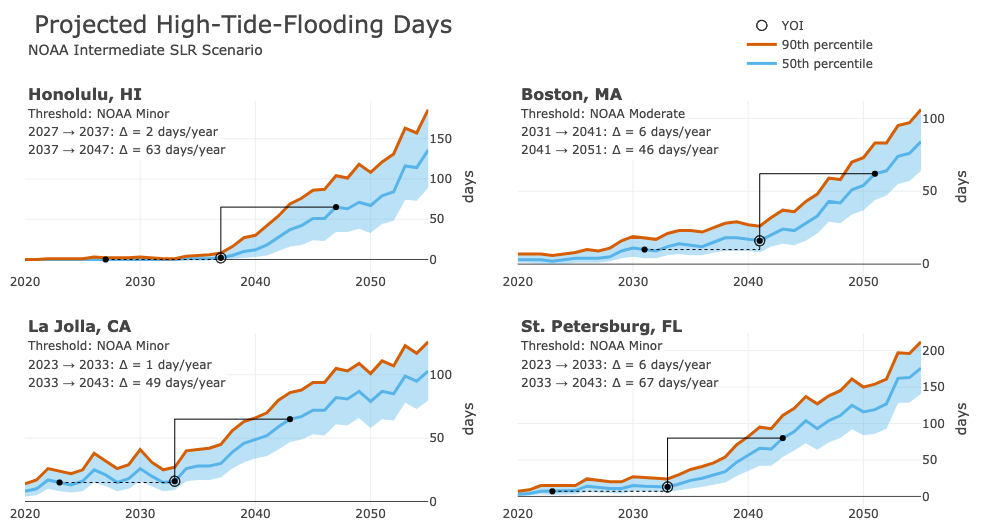

In [4]:
# stations to include in the figure
subset = [
    {"name": "Honolulu, HI", "threshold": "minor", "scenario": "int"},
#     {"name": "Apra Harbor, Guam", "threshold": "minor", "scenario": "int"},
#     {"name": "San Juan, PR", "threshold": "minor", "scenario": "int"},
    {"name": "Boston, MA", "threshold": "moderate", "scenario": "int"},
#     {"name": "Bar Harbor, ME", "threshold": "moderate", "scenario": "int"},
    {"name": "La Jolla, CA", "threshold": "minor", "scenario": "int"},
#     {"name": "Los Angeles, CA", "threshold": "minor", "scenario": "int"},
#     {"name": "San Francisco, CA", "threshold": "minor", "scenario": "int"},
    {"name": "St. Petersburg, FL", "threshold": "minor", "scenario": "int"},
#     {"name": "Panama City Beach, FL", "threshold": "minor", "scenario": "int"},
#     {"name": "Wilmington, NC", "threshold": "minor", "scenario": "int"},
#     {"name": "Virginia Key, FL", "threshold": "minor", "scenario": "int"}
#     {"name": "Vaca Key, FL", "threshold": "minor", "scenario": "int"},
#     {"name": "South Beach, OR", "threshold": "minor", "scenario": "int"},
#     {"name": "Charleston, SC", "threshold": "minor", "scenario": "int"},
]

# quantity of interest
quantity = "xdys_ann_ptl"  # percentiles of annual exceedance day counts

# range of years over which to search for YOIs:
yoi_srch_rng = [2010, 2100]

# horizontal axis limits of the plotted projections (years)
plot_yr_lims = [2020, 2055]

# plot projections
fig = annual_projections(
    analysis, subset, quantity, yoi_srch_rng, plot_yr_lims
)
fig.write_image(maf + "annual_projections_int.pdf", scale=2)

### Supplementary Figure 1: Compare to annual projections using tides and SLR only

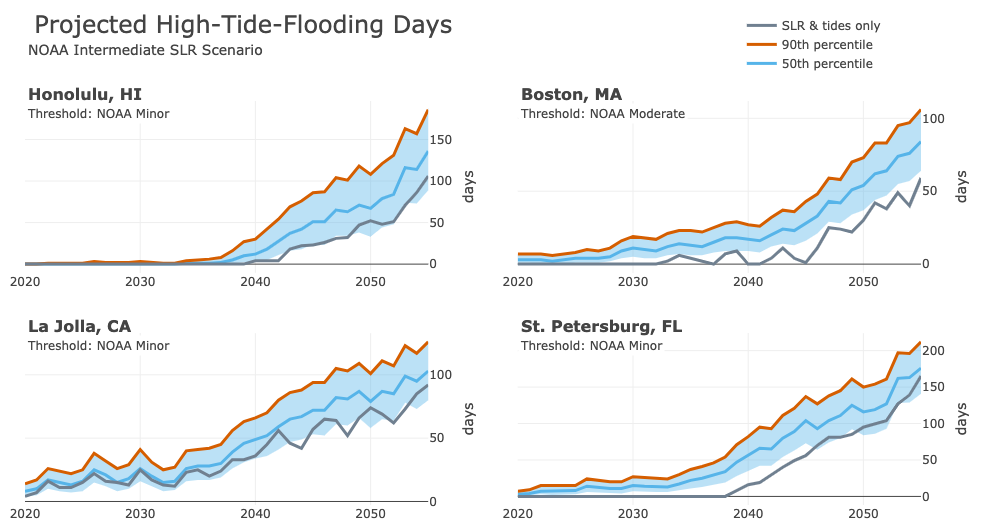

In [5]:
fig = annual_projections(
    analysis, subset, quantity, yoi_srch_rng, plot_yr_lims, show_tides_only=True
)
fig.write_image(maf + "annual_projections_int_tides_only.pdf", scale=2)

### Figure 2: Nodal cycle amplitude

In [6]:
noaa_prjn, ncyc_21, msl = nodal_cycle_example()

[ 1.00396372e+01  3.49451999e-03 -2.16897086e+00  8.66510885e-01]


[ 1.00396372e+01  3.49451999e-03 -2.16897086e+00  8.66510885e-01]
-22.11747496062108
2024.9583333333198
8.892504238325529
9.41371813191018


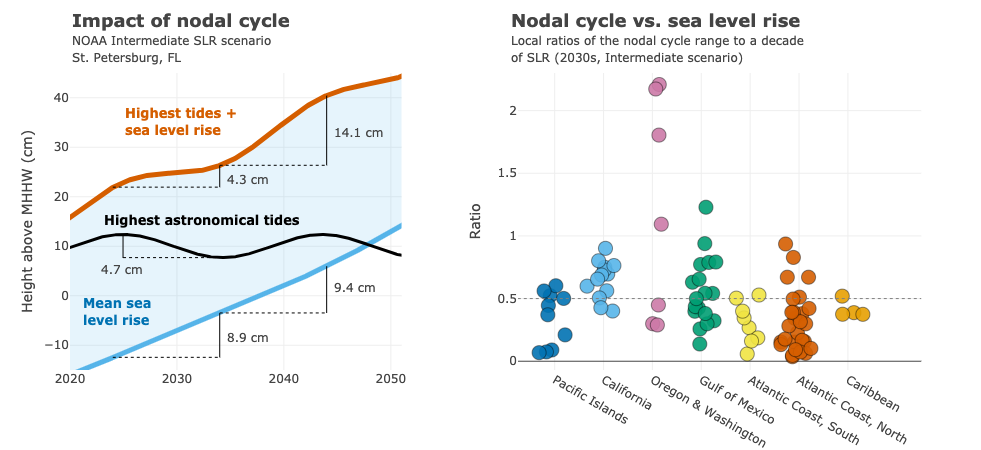

In [7]:
combine_regions = {
    "Gulf of Mexico": ["Gulf of Mexico, West", "Gulf of Mexico, Florida",],
    "Atlantic Coast, North": [
        "Atlantic Coast, North 1",
        "Atlantic Coast, North 2",
    ],
}
fig, results, tot = nodal_cycle_figure(stations, combine_regions=combine_regions)
fig.write_image(maf + "nodal_cycle_vs_slr.pdf", scale=2)

### Figure 3 (and Supplementary Figure 2): Years of inflection for stations around the United States


In [8]:
# combine some regions for the YOI analysis figure
combine_regions = {
    "Gulf of Mexico": ["Gulf of Mexico, West", "Gulf of Mexico, Florida",],
    "Atlantic Coast, North": [
        "Atlantic Coast, North 1",
        "Atlantic Coast, North 2",
    ],
}

# range of years over which to search for YOIs:
yoi_srch_rng = [2010, 2100]

# find yois
yoi = anlyz.yoi_analysis(
    analysis,
    stations,
    search_range=yoi_srch_rng,
    combine_regions=combine_regions,
)

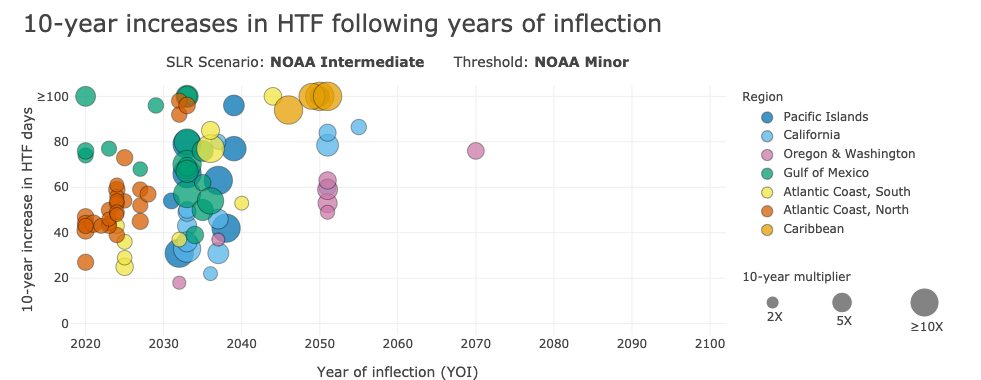

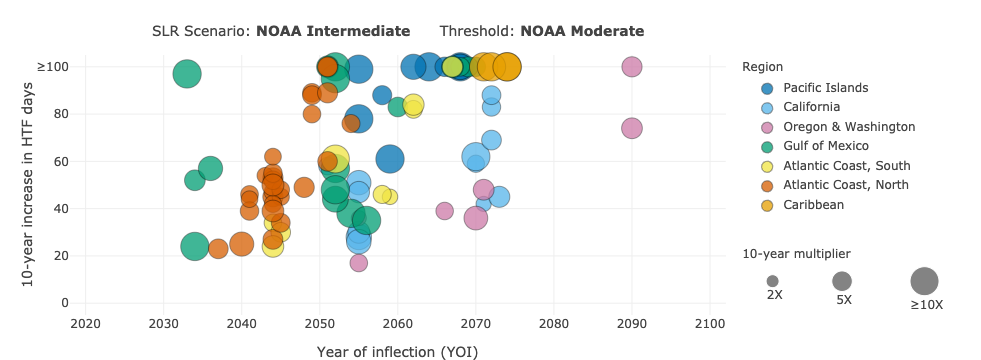

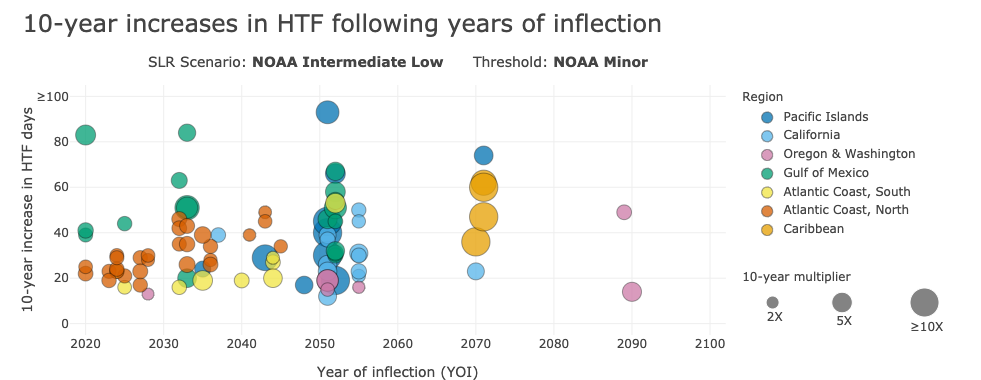

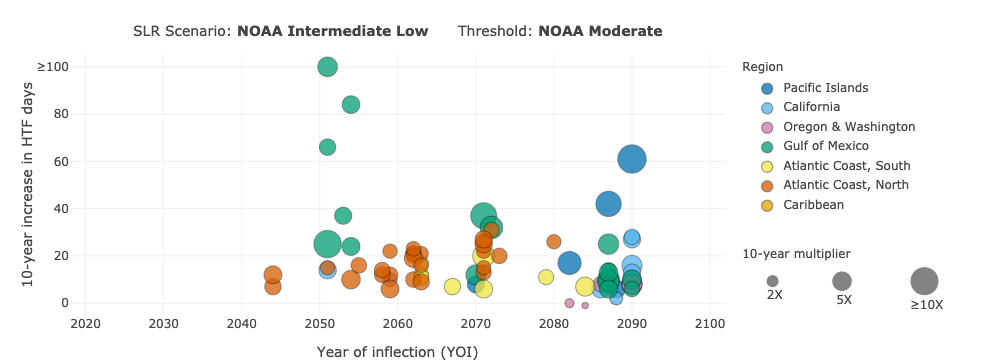

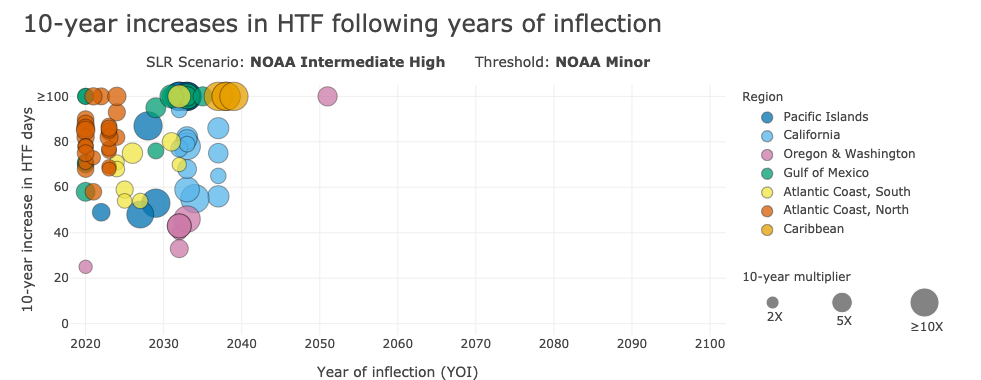

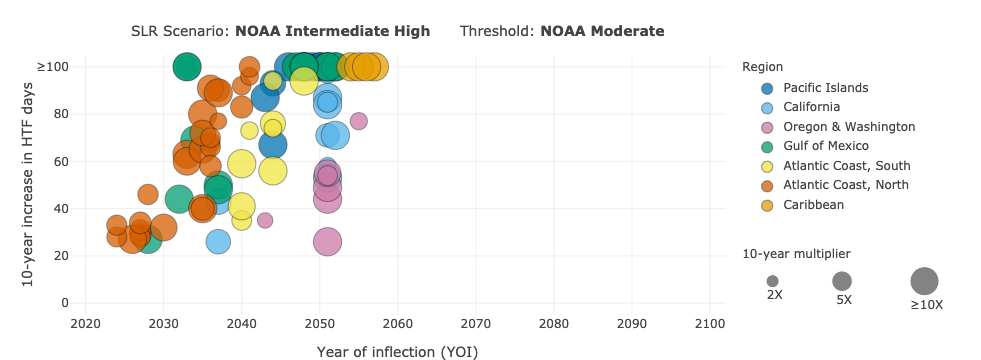

In [9]:
# scenarios and thresholds
slr_scenarios = ["int", "int_low", "int_high"]
thresholds = ["minor", "moderate"]

# generate figures
for scn in slr_scenarios:
    for thrsh in thresholds:
        show_title = True if (thrsh == "minor") else False
        show_xlabel = (
            True  # if (scn == "int_low") & (thrsh == "moderate") else False
        )
        fig = yoi_figure(
            yoi,
            scn,
            thrsh,
            absolute_increase_cap=100,
            multiplier_cap=10,
            show_title=show_title,
            show_xlabel=show_xlabel,
        )
        fig.write_image(maf + "yoi_" + scn + "_" + thrsh + ".pdf", scale=2)

### Supplementary Table 1: YOI summary statistics
Aggregated percentages of stations meeting various criteria in year of inflection (YOI) calculations. Station counts (out of 89 total) are in parentheses.

In [10]:
yoi_midx = pd.MultiIndex.from_tuples(
    [
        ("Station Metadata", "Location", "NOAA ID"),
        ("Station Metadata", "Location", "Name"),
        ("Station Metadata", "Location", "Region"),
        ("Station Metadata", "Thresholds (cm)", "Minor"),
        ("Station Metadata", "Thresholds (cm)", "Moderate"),
        ("Intermediate SLR Scenario", "Minor", "YOI"),
        ("Intermediate SLR Scenario", "Minor", "10A"),
        ("Intermediate SLR Scenario", "Minor", "10M"),
        ("Intermediate SLR Scenario", "Moderate", "YOI"),
        ("Intermediate SLR Scenario", "Moderate", "10A"),
        ("Intermediate SLR Scenario", "Moderate", "10M"),
        ("Intermediate Low SLR Scenario", "Minor", "YOI"),
        ("Intermediate Low SLR Scenario", "Minor", "10A"),
        ("Intermediate Low SLR Scenario", "Minor", "10M"),
        ("Intermediate Low SLR Scenario", "Moderate", "YOI"),
        ("Intermediate Low SLR Scenario", "Moderate", "10A"),
        ("Intermediate Low SLR Scenario", "Moderate", "10M"),
        
    ]
)
yoi_table = pd.DataFrame(columns=yoi_midx)
yoi_table.loc[:, ("Station Metadata", "Location", "NOAA ID")] = stations["NOAA ID"]
yoi_table.loc[:, ("Station Metadata", "Location", "Name")] = stations.index
yoi_table.loc[:, ("Station Metadata", "Location", "Region")] = stations["Region"]
yoi_table.index = range(yoi_table.index.size)

yoi0 = yoi.replace(to_replace=[np.nan], value=[None])
yoi0.index = yoi0["NOAA ID"]
yoi0 = yoi0.loc[stations["NOAA ID"]]

z = (yoi0.Scenario == "int") & (yoi0.Threshold == "minor")
yoi_table.loc[:, ("Intermediate SLR Scenario", "Minor", "YOI")] = yoi0.YOI.loc[z].astype(int).values
yoi_table.loc[:, ("Intermediate SLR Scenario", "Minor", "10A")] = yoi0["10-year increase"].loc[z].astype(int).values
yoi_table.loc[:, ("Intermediate SLR Scenario", "Minor", "10M")] = yoi0["10-year multiplier"].loc[z].values

z = (yoi0.Scenario == "int") & (yoi0.Threshold == "moderate")              
yoi_table.loc[:, ("Intermediate SLR Scenario", "Moderate", "YOI")] = yoi0.YOI.loc[z].astype(int).values
yoi_table.loc[:, ("Intermediate SLR Scenario", "Moderate", "10A")] = yoi0["10-year increase"].loc[z].astype(int).values
yoi_table.loc[:, ("Intermediate SLR Scenario", "Moderate", "10M")] = yoi0["10-year multiplier"].loc[z].values

z = (yoi0.Scenario == "int_low") & (yoi0.Threshold == "minor")
yoi_table.loc[:, ("Intermediate Low SLR Scenario", "Minor", "YOI")] = yoi0.YOI.loc[z].astype(int).values
yoi_table.loc[:, ("Intermediate Low SLR Scenario", "Minor", "10A")] = yoi0["10-year increase"].loc[z].astype(int).values
yoi_table.loc[:, ("Intermediate Low SLR Scenario", "Minor", "10M")] = yoi0["10-year multiplier"].loc[z].values

z = (yoi0.Scenario == "int_low") & (yoi0.Threshold == "moderate")
yoi_table.loc[:, ("Intermediate Low SLR Scenario", "Moderate", "YOI")] = [str(int(v)) if v is not None else "-" for v in yoi0.YOI.loc[z].values]
yoi_table.loc[:, ("Intermediate Low SLR Scenario", "Moderate", "10A")] = [str(int(v)) if v is not None else "-" for v in yoi0["10-year increase"].loc[z].values]
yoi_table.loc[:, ("Intermediate Low SLR Scenario", "Moderate", "10M")] = [str(v) if v is not None else "-" for v in yoi0["10-year multiplier"].loc[z].values]

yoi_table.index += 1

for k, rw in yoi_table.iterrows():
    
    sta_id = str(rw.loc[("Station Metadata", "Location", "NOAA ID")])
    sta = stations.loc[stations["NOAA ID"] == int(sta_id)].copy()
    sta["name"] = sta.index[0]
    sta = sta.iloc[0]
    sta["noaa id"] = sta["NOAA ID"]
    sta_str = anlyz.station_string(sta)
    
    sta_path = "../projections/output/" + sta_str + "/"
    fname = sta_path + "noaa_thresholds.pickle"
    with open(fname, "rb") as f:
        dthrsh = pickle.load(f)
        
    yoi_table.loc[k, ("Station Metadata", "Thresholds (cm)", "Minor")] = int(dthrsh["minor"])
    yoi_table.loc[k, ("Station Metadata", "Thresholds (cm)", "Moderate")] = int(dthrsh["moderate"])
    
yoi_table.style.set_properties(
    **{"line-height": "1em"}
)
# with open(maf + "yoi_table.tex", "w") as f:
#     yoi_table.astype(str).to_latex(f, longtable=True)

In [11]:
# scenarios and thresholds
slr_scenarios = ["int", "int_low"]
thresholds = ["minor", "moderate"]
# region = None
region = ["Gulf of Mexico"]
# region = ["Atlantic Coast, North"]#, "Atlantic Coast, South"]
# region = ["Pacific Islands", "California", "Gulf of Mexico"]
# region = ["Pacific Islands", "California", "Gulf of Mexico"]


# generate stats table
yoi_table = []
for scn in slr_scenarios:
    for thrsh in thresholds:
        stats, soi = yoi_stats(yoi, scn, thrsh, region)
        yoi_table.append(stats)
        if (scn == "int") & (thrsh == "minor"):
            stn_of_interest = soi
yoi_table = pd.concat(yoi_table, axis=1)

# pd.set_option("max_colwidth", 30)
# yoi_table.style.format.background_gradient(cmap='Blues')
yoi_table.style.set_properties(
    **{"line-height": "1em"}
).set_properties(
    subset=["Intermediate", "Intermediate Low"],
    **{"width": "100px"}
)
# with open(maf + "yoi_table.tex", "w") as f:
#     yoi_table.to_latex(f)
    

### Supplementary Figure 3: Projections of HTF climatology

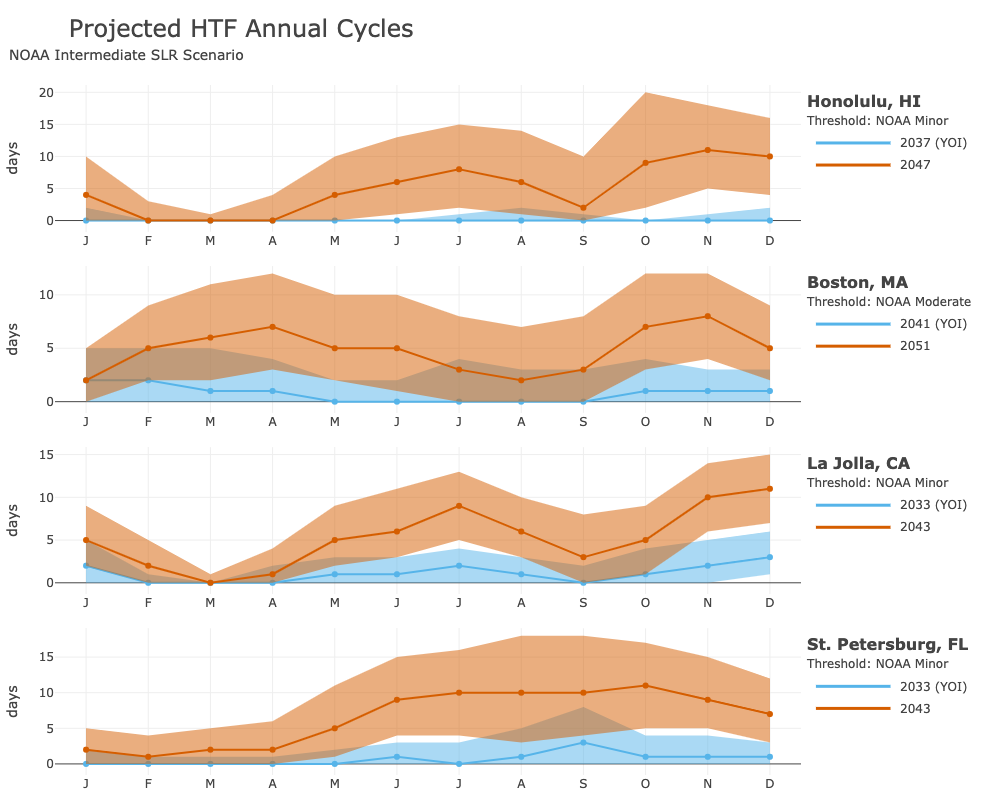

In [12]:
quantity = "xdys_mo_ptl"
fig = climatology_projections(analysis, subset, quantity, yoi_srch_rng)
# fig.write_image(maf + "climatology_int.pdf", scale=2)

### Figure 4: Clustering of HTF days in pentads

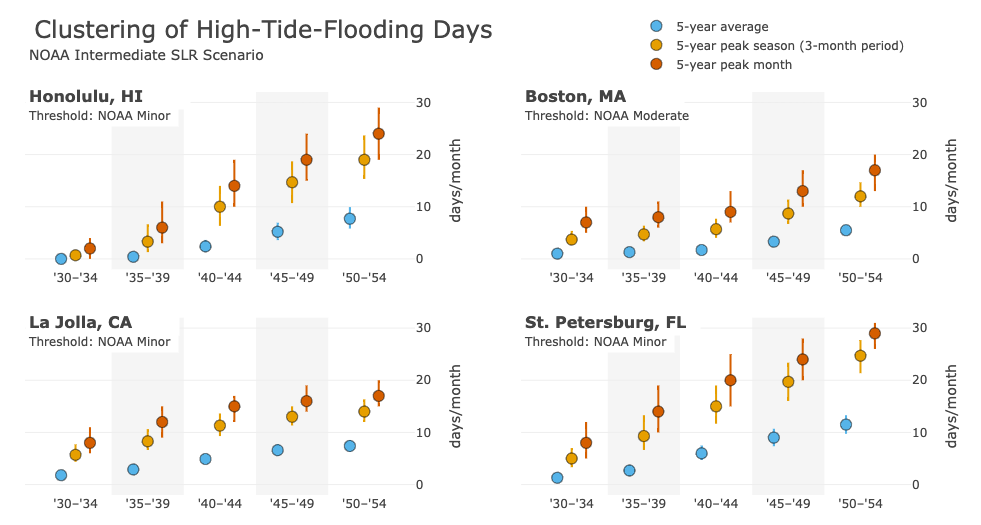

In [13]:
fig = pentad_figures(analysis, subset, [2030, 2050])
# fig.write_image(maf + "pentads_int.pdf", scale=2)

### Figure 5: Effect of clustering on planning horizons (Intermediate scenario)

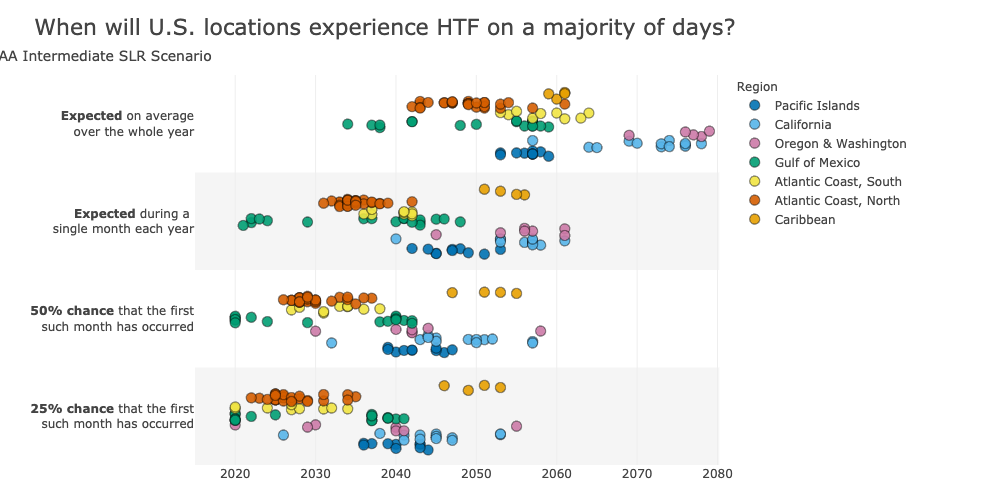

In [14]:
# perform first month analysis and generate figure
count = 15
fmo_df = anlyz.first_month_analysis(
    count, analysis, stations, combine_regions=combine_regions
)
fig = first_month_figure(
    fmo_df,
    slr_scenario="int",
    threshold="minor",  
    # min_mod_switch=["Expected monthly", 2030],
)
fig.write_image(maf + "first_month_int.pdf", scale=2)

### Supplementary Figure 4: Effect of clustering on planning horizons (Intermediate Low scenario)

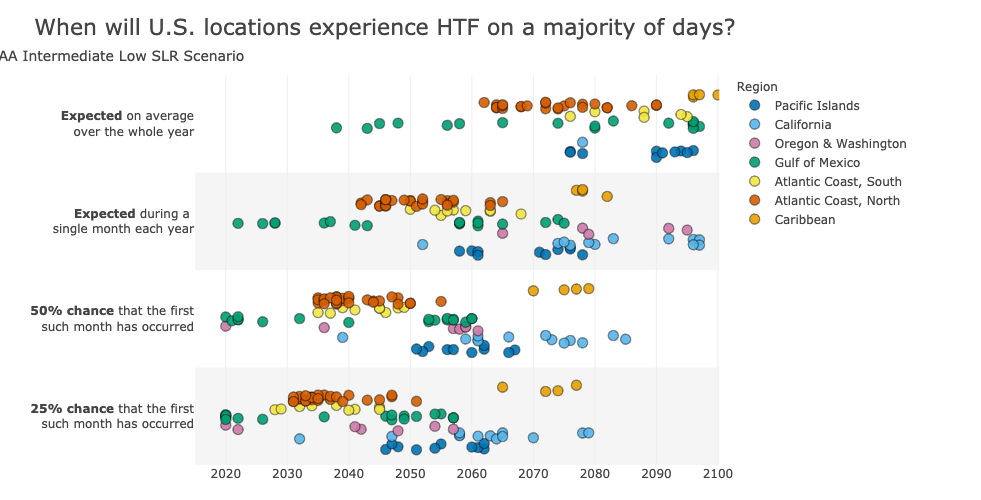

In [15]:
fig = first_month_figure(
    fmo_df,
    slr_scenario="int_low",
    threshold="minor",  
    year_range=[2015, 2100],
)
fig.write_image(maf + "first_month_int_low.pdf", scale=2)

In [16]:
fmo_stats = first_month_stats(fmo_df, threshold="minor", year_diff=[15, 20, 25])
fmo_stats

57.3% (88.8%) of stations have a 50% chance of experiencing first month prior to 2040 (2050)


EA-P25     EA-P50    
                                   %   N      %   N
Region                     ≥                       
All (89)                   15   87.6  78   80.9  72
                           20   64.0  57   41.6  37
                           25   36.0  32   23.6  21
Atlantic Coast, North (28) 15   96.4  27   78.6  22
                           20   64.3  18   32.1   9
                           25   25.0   7   10.7   3
Atlantic Coast, South (09) 15  100.0   9  100.0   9
                           20  100.0   9   77.8   7
                           25   88.9   8   66.7   6
California (13)            15  100.0  13  100.0  13
                           20  100.0  13   84.6  11
                           25   69.2   9   30.8   4
Caribbean (04)             15    0.0   0    0.0   0
                           20    0.0   0    0.0   0
                           25    0.0   0    0.0   0
Gulf of Mexico (18)        15   94.4  17   94.4  17
                           20   44.4   8   16.7   3
                           25    5.6   1    5.6   1
Oregon & Washington (07)   15  100.0   7  100.0   7
                           20  100.0   7  100.0   7
                           25  100.0   7  100.0   7
Pacific Islands (10)       15   50.0   5   40.0   4
                           20   20.0   2    0.0   0
                           25    0.0   0    0.0   0

### Supplmentary Figure 5: Demonstration of the statistical model relating tides and MSL to HTF days

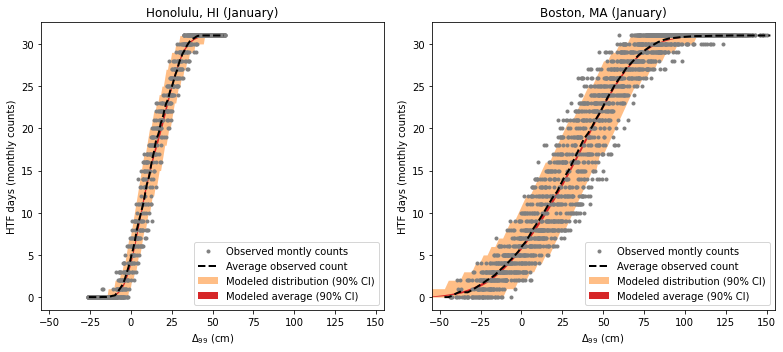

In [17]:
stations = anlyz.station_list()

# select two cases to show
cases = [
    {
        "sta": stations.loc[stations["noaa id"] == 1612340].iloc[0], # honolulu
        "mo": 1,
        "tod": [0, 23],
    },
    {
        "sta": stations.loc[stations["noaa id"] == 8443970].iloc[0], # boston
        "mo": 1,
        "tod": [0, 23],
    },
]

fig = thrsh_exprmnts_fig(cases)

fname = maf + "fig_methods_bb_fit.pdf"
fig.savefig(fname)